In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def load_img():
    blank_img=np.zeros((600,600))
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text="ABCDE",org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
    return blank_img

In [18]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

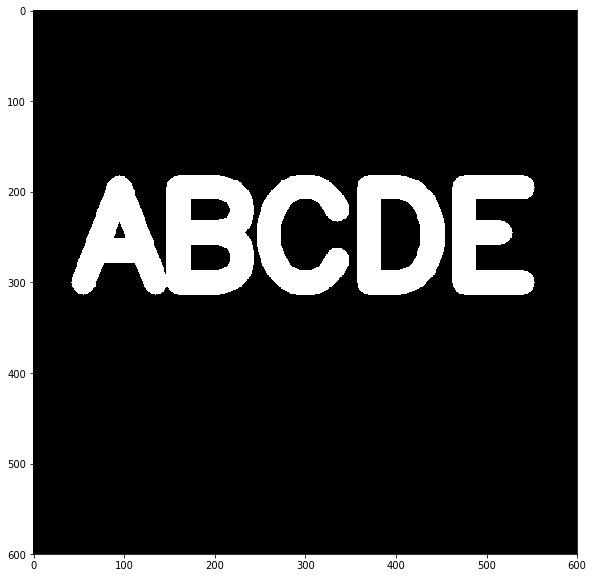

In [19]:
img=load_img()
display_img(img)

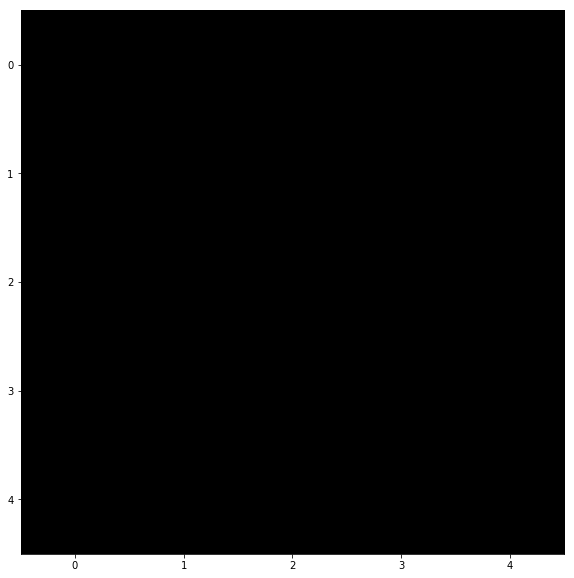

In [20]:
kernel=np.ones((5,5),dtype=np.uint8)
display_img(kernel)

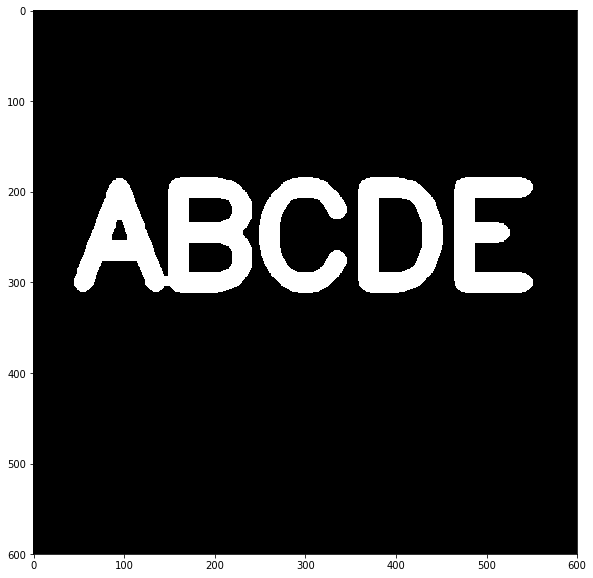

In [21]:
result=cv2.erode(img,kernel,iterations=1)
display_img(result)

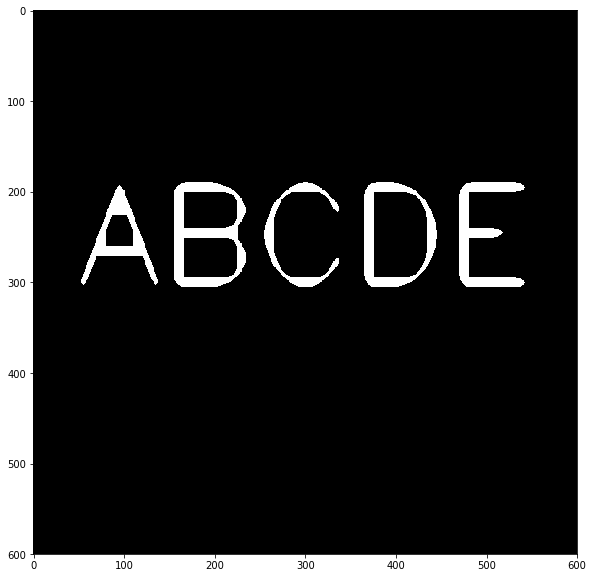

In [22]:
result=cv2.erode(img,kernel,iterations=4)
display_img(result)

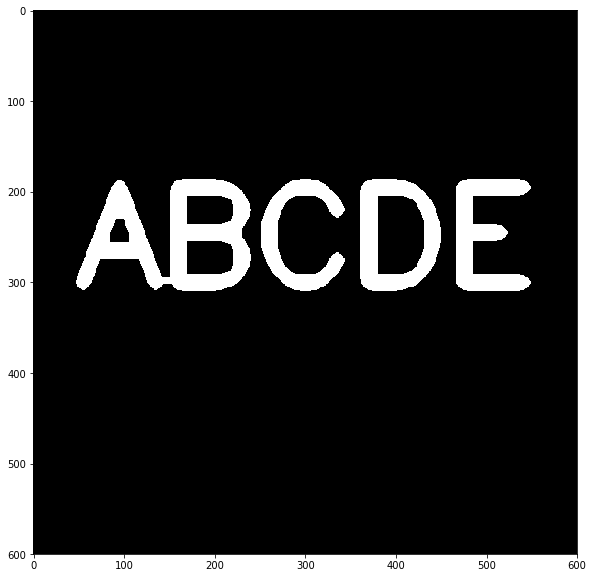

In [25]:
result=cv2.erode(img,kernel,iterations=2)
display_img(result)

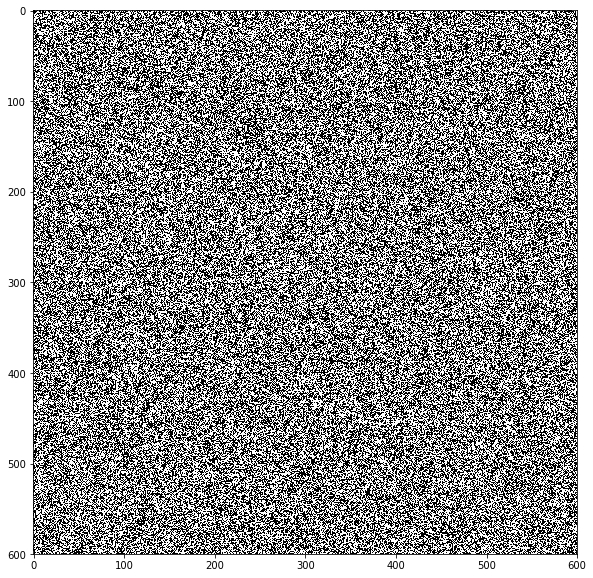

In [42]:
white_noise=np.random.randint(low=0,high=2,size=(600,600))
display_img(white_noise)

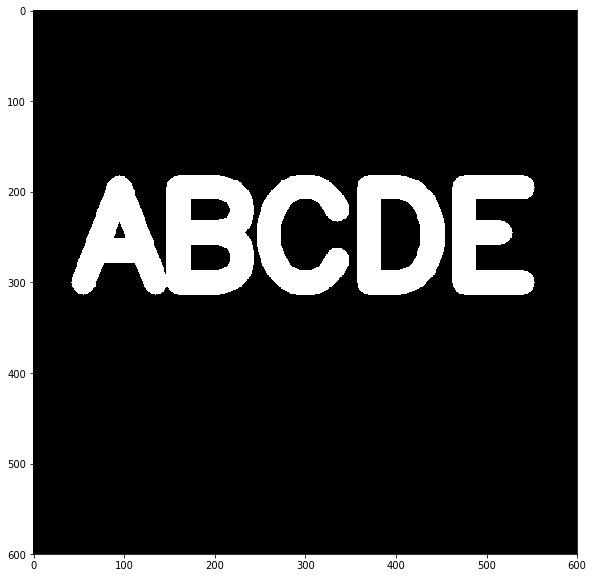

In [43]:
img=load_img()
display_img(img)

In [44]:
img.max()

255.0

In [45]:
white_noise.max()

1

In [46]:
#convert whitenoise to 255 and 0 pixel values as in img above
white_noise=white_noise*255
white_noise.max()

255

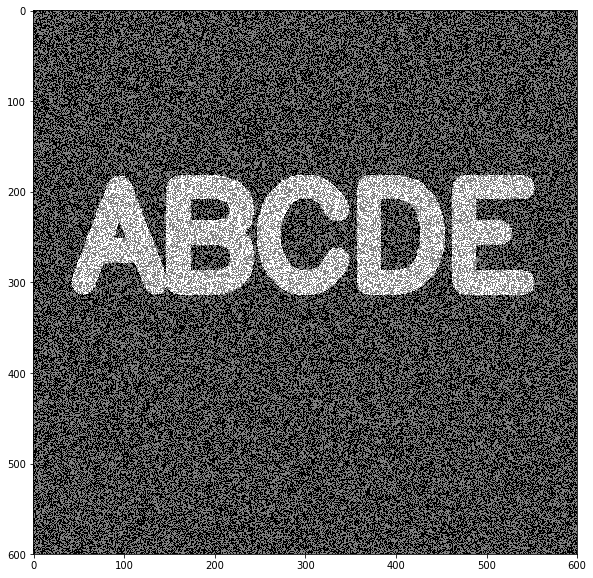

In [48]:
noise_img=white_noise+img
display_img(noise_img)

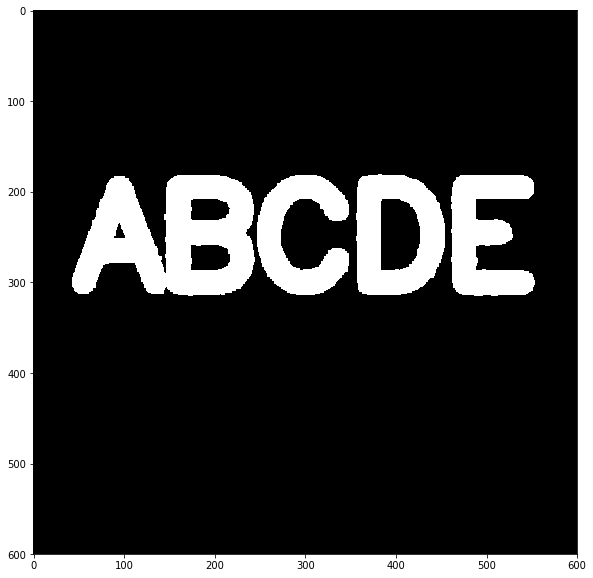

In [52]:
opening=cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

In [74]:
#now experiment with background noise
img=load_img()

In [75]:
black_noise=np.random.randint(low=0,high=2,size=(600,600))

In [76]:
black_noise

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 1, 1]])

In [77]:
black_noise=black_noise*-255
black_noise

array([[-255,    0, -255, ...,    0,    0,    0],
       [-255, -255, -255, ...,    0,    0,    0],
       [   0, -255,    0, ..., -255, -255,    0],
       ...,
       [   0, -255,    0, ...,    0, -255, -255],
       [   0,    0,    0, ...,    0, -255, -255],
       [-255, -255,    0, ...,    0, -255, -255]])

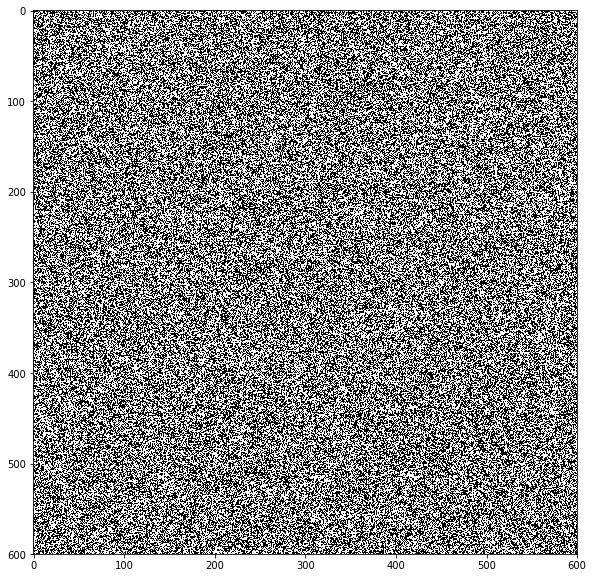

In [78]:
display_img(black_noise)

In [79]:
black_noise_img=black_noise+img#adding correcpondind pixels as both are of same size

In [80]:
black_noise_img

array([[-255.,    0., -255., ...,    0.,    0.,    0.],
       [-255., -255., -255., ...,    0.,    0.,    0.],
       [   0., -255.,    0., ..., -255., -255.,    0.],
       ...,
       [   0., -255.,    0., ...,    0., -255., -255.],
       [   0.,    0.,    0., ...,    0., -255., -255.],
       [-255., -255.,    0., ...,    0., -255., -255.]])

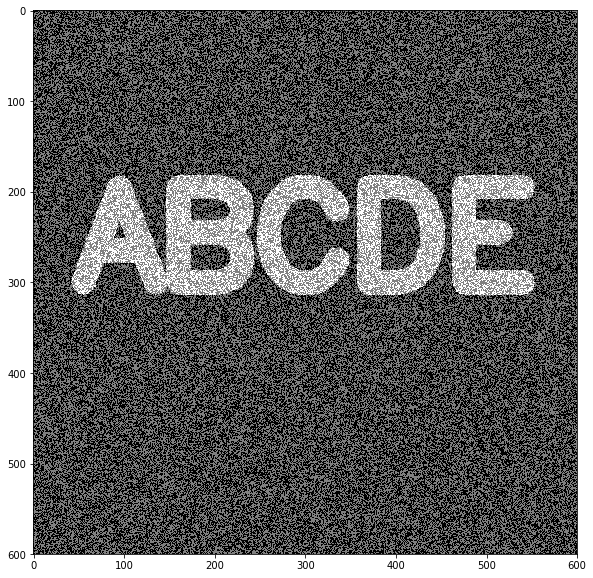

In [81]:
display_img(black_noise_img)

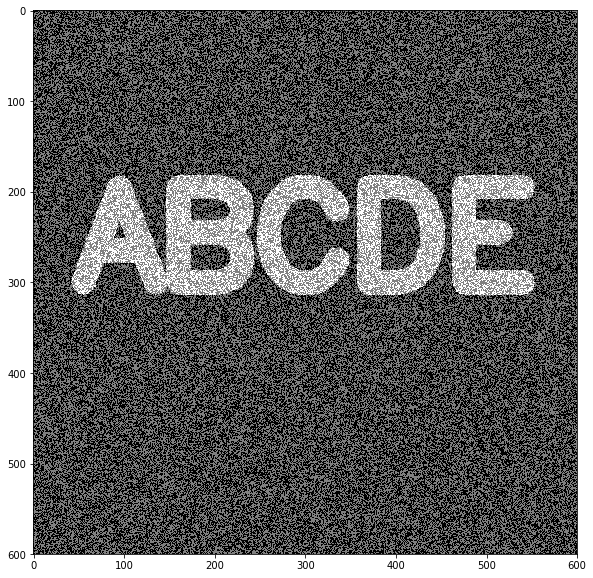

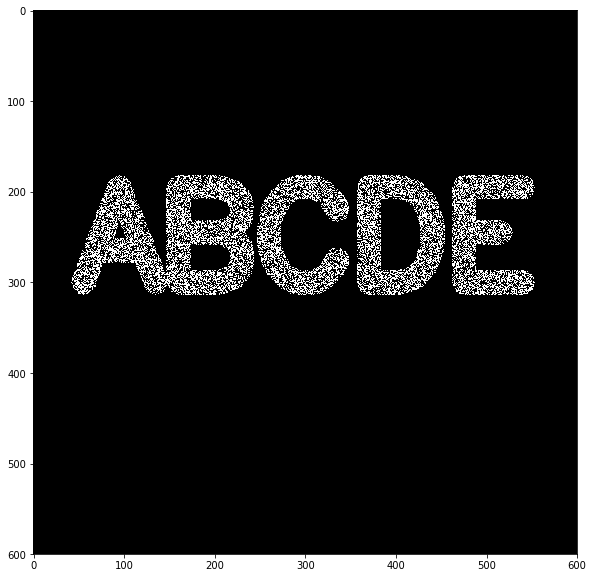

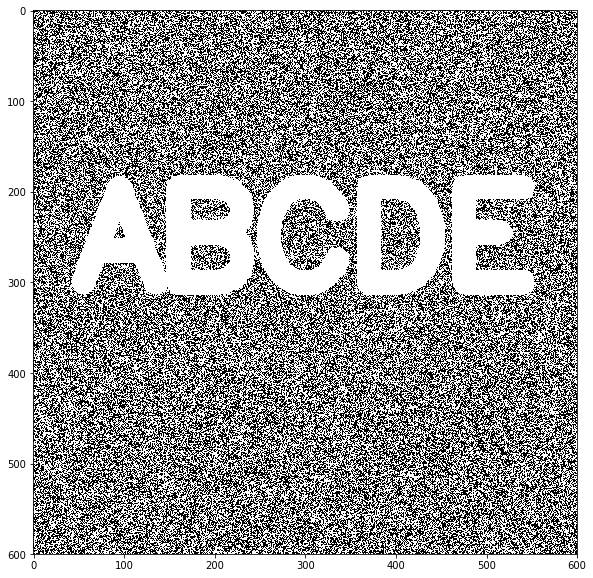

In [84]:
black_foregroundnoise_img=black_noise_img.copy()
black_backgroundnoise_img=black_noise_img.copy()
black_foregroundnoise_img[black_foregroundnoise_img==-255]=0
black_backgroundnoise_img[black_backgroundnoise_img==255]=0
display_img(black_noise_img)
display_img(black_foregroundnoise_img)
display_img(black_backgroundnoise_img)

In [96]:
closing=cv2.morphologyEx(black_foregroundnoise_img,cv2.MORPH_CLOSE,kernel)

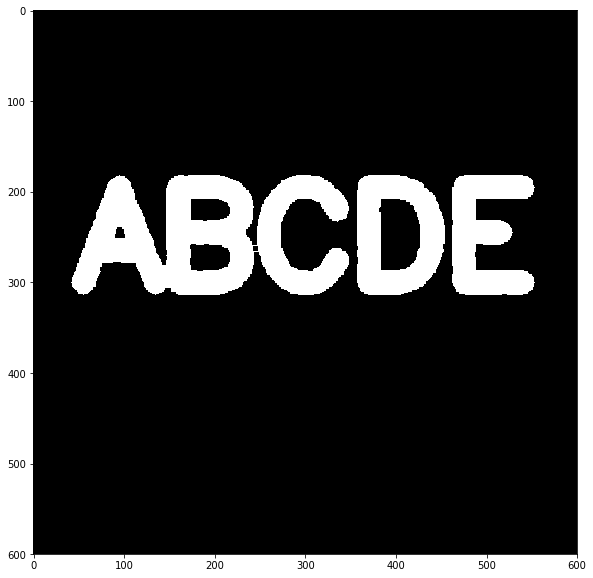

In [97]:
display_img(closing)

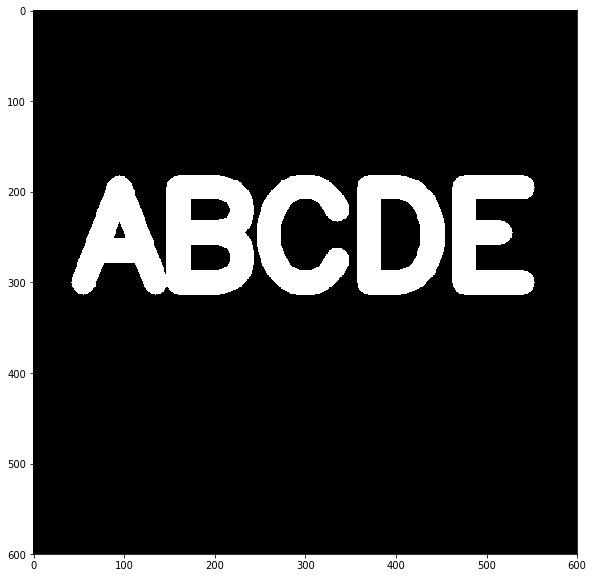

In [92]:
img=load_img()
display_img(img)

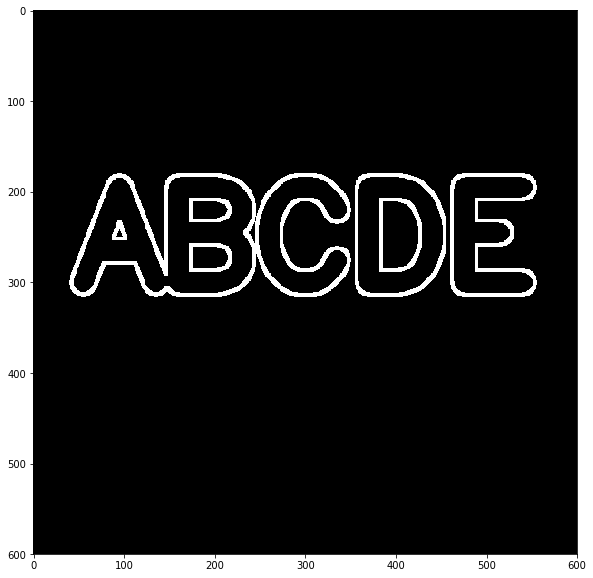

In [93]:
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)